### Compare fidelity of GHZ, W and Haar random state preparation from Alternating layered ansatz

In [26]:
import qiskit, sys
import matplotlib.pyplot as plt
import numpy as np
sys.path.insert(1, '../')
import qtm.qcompilation
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
num_qubits = 3
num_layers = 1
theta = np.pi/3
thetas_origin = np.random.random((num_qubits*5 - 4)*num_layers)

In [10]:
compiler = qtm.qcompilation.QuantumCompilation(
    u = qtm.ansatz.create_alternating_layerd_ansatz,
    vdagger = qtm.state.create_ghz_state(num_qubits).inverse(),
    optimizer = 'adam',
    loss_func = 'loss_basic',
    thetas = thetas_origin.copy(),
    num_layers = num_layers
)

compiler.fit(num_steps=100, verbose = 1)

Step: 100%|██████████| 100/100 [04:04<00:00,  2.44s/it]


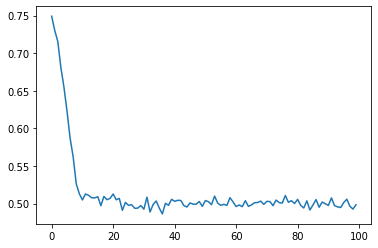

In [11]:
plt.plot(compiler.loss_values)

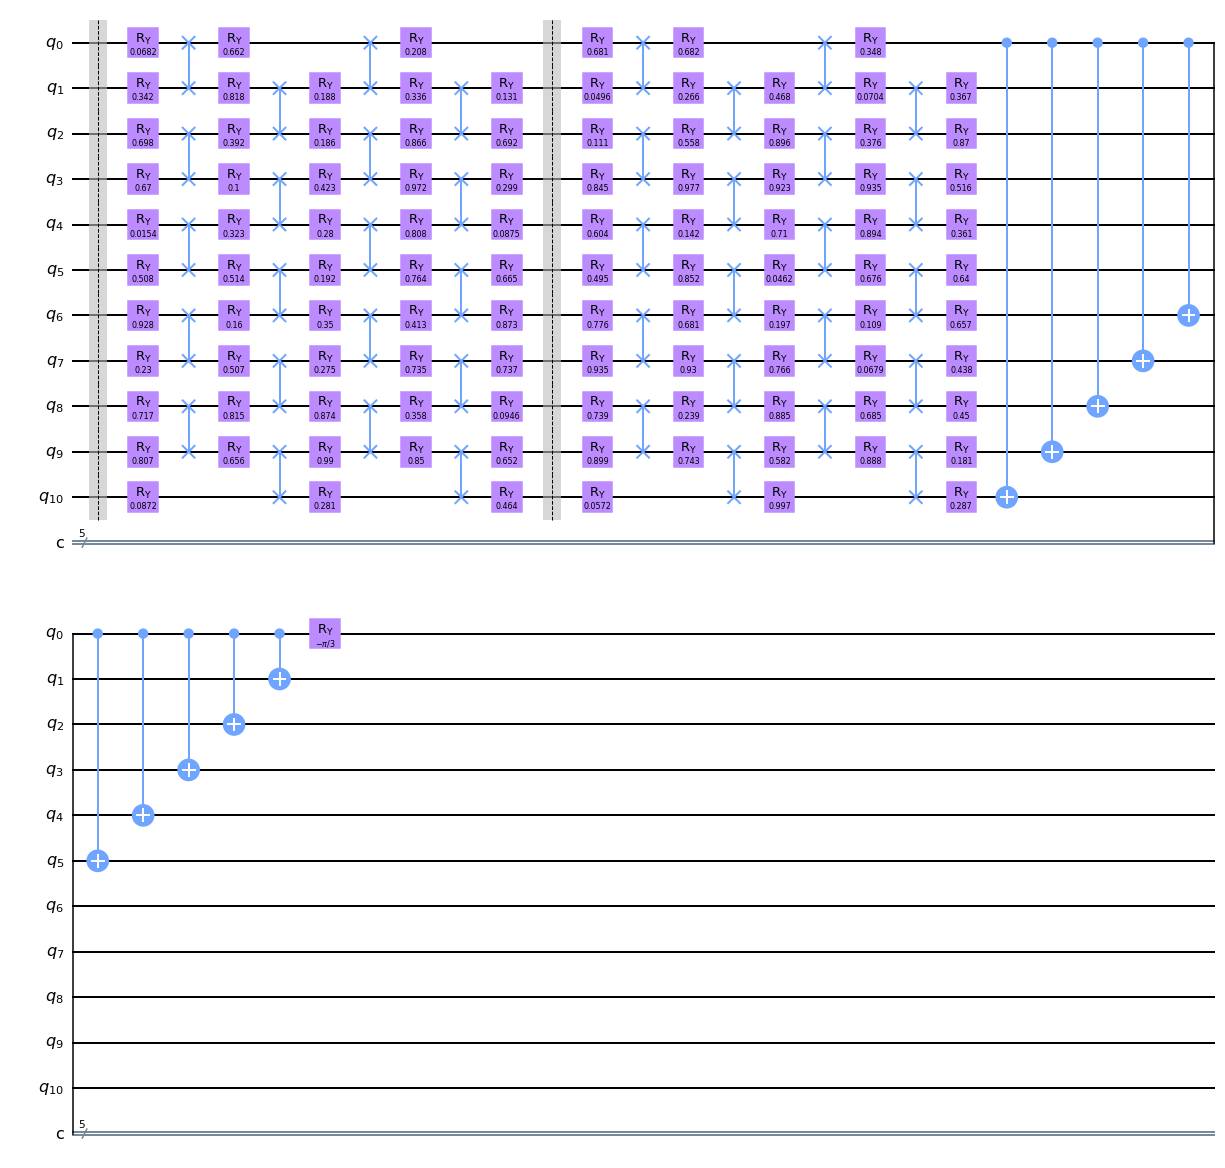

In [33]:
qc = qiskit.QuantumCircuit(11,5)
thetas = np.random.random((11*5 - 4)*2)
qc = qtm.ansatz.create_GHZchecker_alternating_layered(qc, thetas, 2, theta)
qc.draw('mpl')

In [9]:
compiler = qtm.qcompilation.QuantumCompilation(
    u = qtm.ansatz.create_alternating_layerd_ansatz,
    vdagger = qtm.state.create_w_state(num_qubits).inverse(),
    optimizer = 'adam',
    loss_func = 'loss_basic',
    thetas = thetas_origin.copy(),
    num_layers = num_layers
)

compiler.fit(num_steps=10, verbose = 1)

Step: 100%|██████████| 10/10 [00:38<00:00,  3.82s/it]


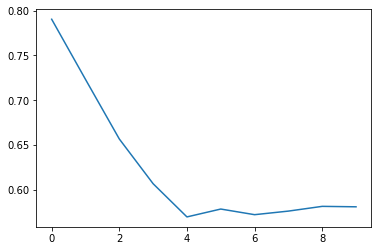

In [10]:
plt.plot(compiler.loss_values)

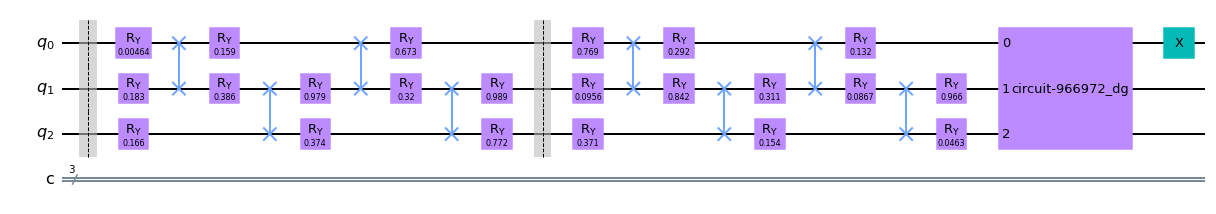

In [11]:
qc = qiskit.QuantumCircuit(3,3)
thetas = np.random.random((3*5 - 4)*2)
qc = qtm.ansatz.create_Wchecker_alternating_layered(qc, thetas, 2)
qc.draw('mpl')

In [33]:
compiler = qtm.qcompilation.QuantumCompilation(
    u = qtm.ansatz.create_alternating_layerd_ansatz,
    vdagger = qtm.state.create_haar_state(num_qubits).inverse(),
    optimizer = 'adam',
    loss_func = 'loss_basic',
    thetas = thetas_origin.copy(),
    num_layers = num_layers
)

compiler.fit(num_steps=10, verbose = 1)

TypeError: fit() missing 1 required positional argument: 'v'

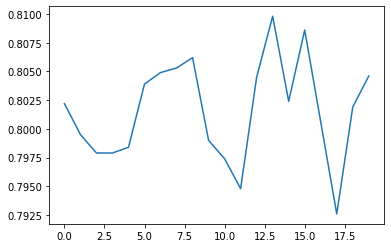

In [32]:
plt.plot(compiler.loss_values)